# DBCV Experiments

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.io import arff
from src.Evaluation.DBCV.dbcv_new import validity_index as DBCV
from src.Evaluation.DISCO.disco import disco_score as DISCO

### Load data

In [2]:
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from datasets.density_datasets import download_dataset
def standardize(X, l, axis=None):
    std = np.std(X, axis=axis)
    mean = np.mean(X, axis=axis)
    if axis is not None:
        std = np.expand_dims(std, axis)
        mean = np.expand_dims(mean, axis)
    X = (X - mean) / std
    return X, l

X_cluto_4_8_std, l_cluto_4_8_std = download_dataset('cluto-t4-8k')
X_cluto_4_8_std, l_cluto_4_8_std = standardize(X_cluto_4_8_std, l_cluto_4_8_std)
X_cluto_4_8_std = X_cluto_4_8_std[l_cluto_4_8_std != -1]
l_cluto_4_8_std = l_cluto_4_8_std[l_cluto_4_8_std != -1]



X_cluto_8_8_std, l_cluto_8_8_std = download_dataset('cluto-t8-8k')
X_cluto_8_8_std, l_cluto_8_8_std = standardize(X_cluto_8_8_std, l_cluto_8_8_std)
X_cluto_8_8_std = X_cluto_8_8_std[l_cluto_8_8_std != -1]
l_cluto_8_8_std = l_cluto_8_8_std[l_cluto_8_8_std != -1]

In [3]:
def run_multiple_shuffle_runs(RUNS, X, l):
    shuffle_report= []
    np.random.seed(0)
    seeds = np.random.choice(10_000, size=RUNS, replace=False)
    for run in tqdm(range(RUNS)):
        np.random.seed(seeds[run])
        shuffle_data_index = np.random.choice(len(X), size=len(X), replace=False)
        X_ = X[shuffle_data_index]
        l_ = l[shuffle_data_index]
        dbcv_shuffle = DBCV(X_, l_,metric='sqeuclidean')
        shuffle_report.append(dbcv_shuffle)
    return shuffle_report

In [4]:
n = 100

dbcv_list_cluto_4_8_std = run_multiple_shuffle_runs(n, X_cluto_4_8_std, l_cluto_4_8_std)
dbcv_list_cluto_8_8_std = run_multiple_shuffle_runs(n, X_cluto_8_8_std, l_cluto_8_8_std)


100%|██████████| 100/100 [01:19<00:00,  1.25it/s]


In [5]:
dbcv_cluto_8_4_std = pd.DataFrame(data = np.array(dbcv_list_cluto_4_8_std), columns = ['DBCV'])
dbcv_cluto_8_8_std = pd.DataFrame(data = np.array(dbcv_list_cluto_8_8_std), columns = ['DBCV'])

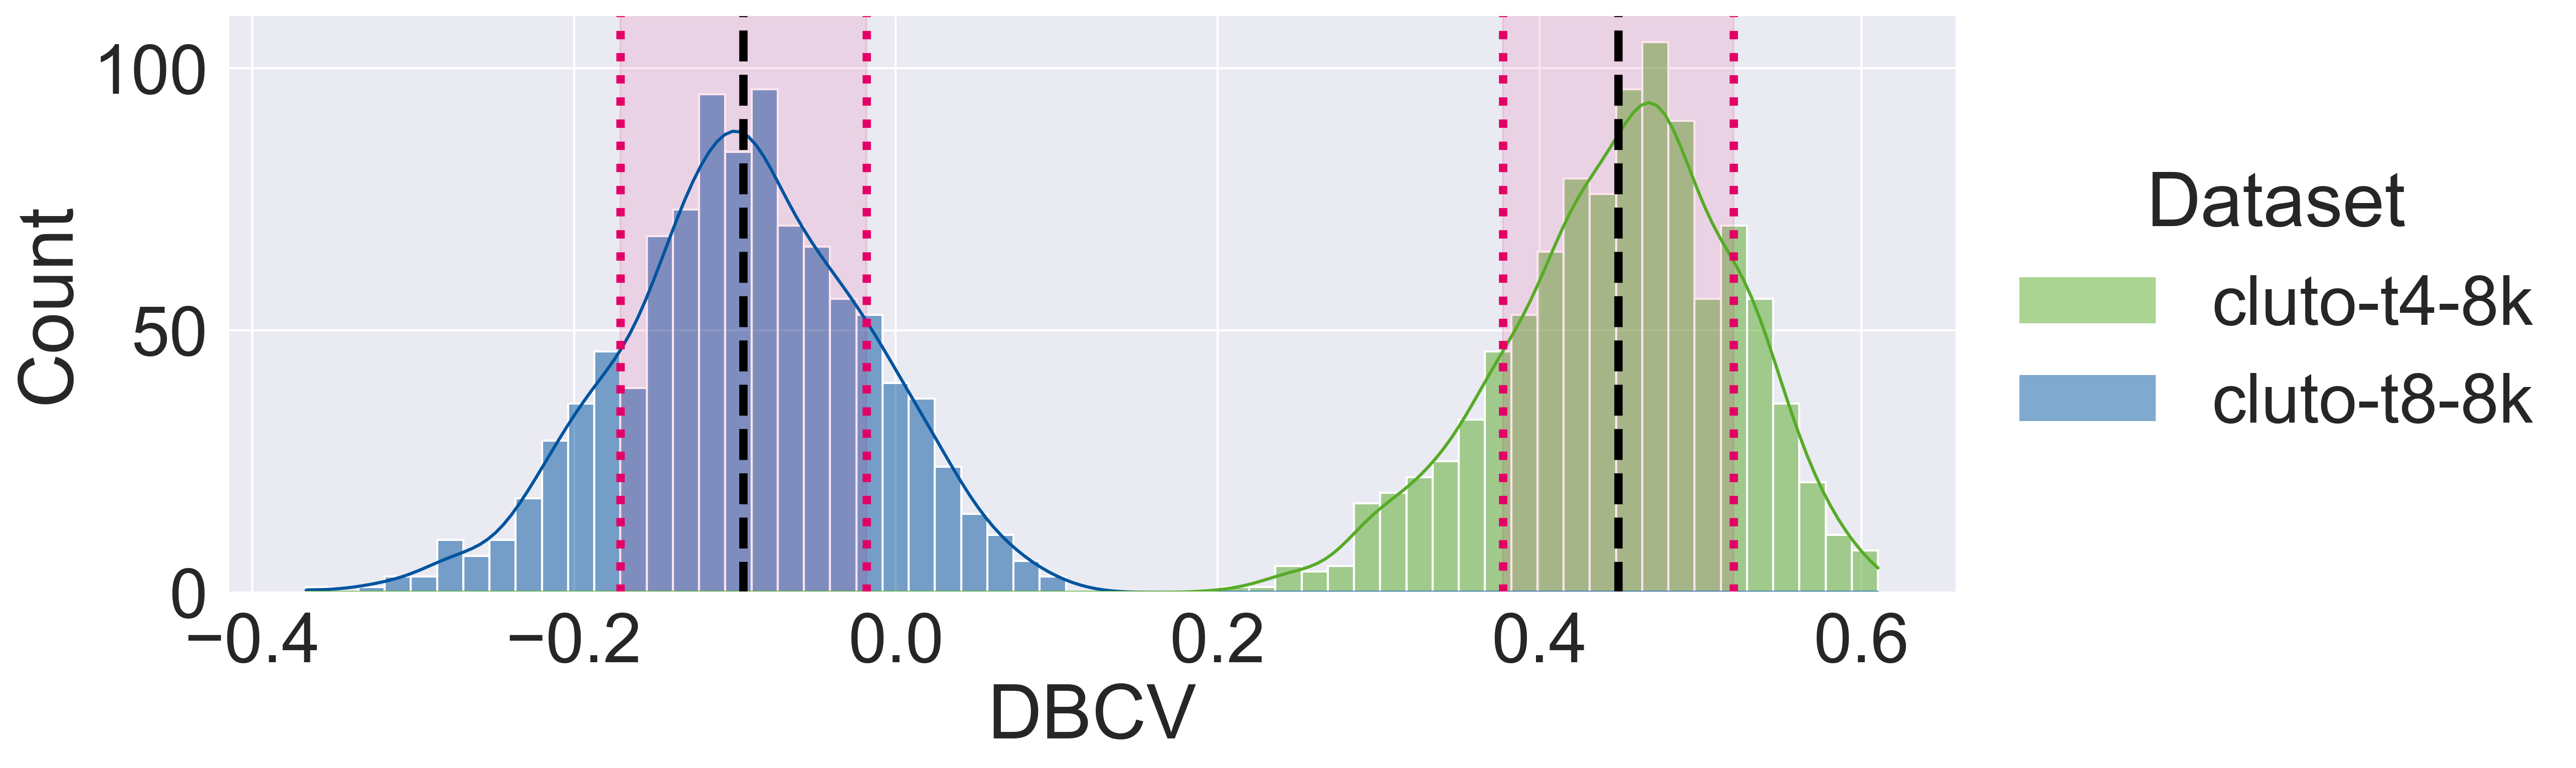

In [9]:
x = dbcv_cluto_8_4_std['DBCV']
y = dbcv_cluto_8_8_std['DBCV']
sns.set(font_scale=3)
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'DBCV': x, 'Dataset': 'cluto-t4-8k'}),
    pd.DataFrame.from_dict({'DBCV': y, 'Dataset': 'cluto-t8-8k'})
])
# Create an array with the colors you want to use
colors = ["#57AB27","#00549F", "#0098A1","#006165",]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(
    data=df, x='DBCV', hue='Dataset', ax=ax, kde=True, bins=60
)
mean = dbcv_cluto_8_8_std['DBCV'].mean()
std = dbcv_cluto_8_8_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

mean = dbcv_cluto_8_4_std['DBCV'].mean()
std = dbcv_cluto_8_4_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.tight_layout()
fig.set_dpi(300)

In [10]:
n = 1000
dbcv_list_cluto_4_8_std = run_multiple_shuffle_runs(n, X_cluto_4_8_std, l_cluto_4_8_std)
dbcv_list_cluto_8_8_std = run_multiple_shuffle_runs(n, X_cluto_8_8_std, l_cluto_8_8_std)

100%|██████████| 1000/1000 [18:30<00:00,  1.11s/it] 


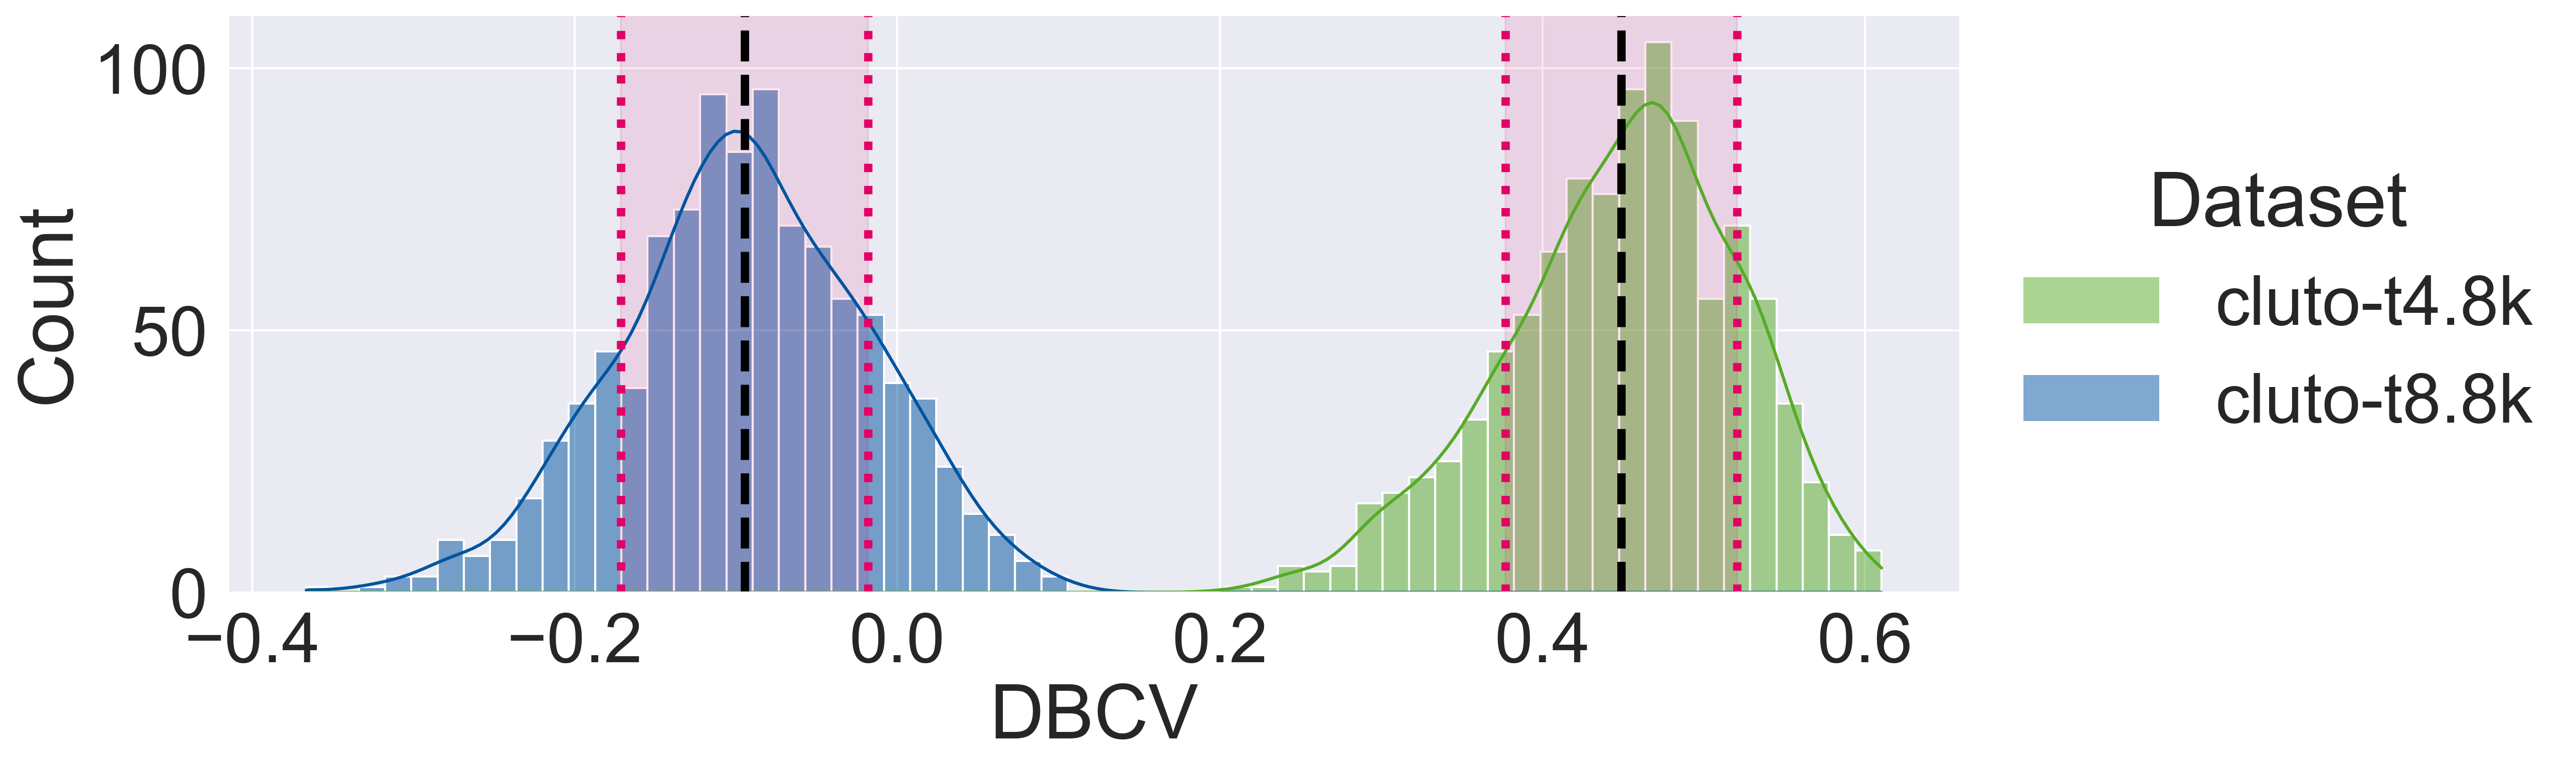

In [11]:
dbcv_cluto_8_4_std = pd.DataFrame(data = np.array(dbcv_list_cluto_4_8_std), columns = ['DBCV'])
dbcv_cluto_8_8_std = pd.DataFrame(data = np.array(dbcv_list_cluto_8_8_std), columns = ['DBCV'])

x = dbcv_cluto_8_4_std['DBCV']
y = dbcv_cluto_8_8_std['DBCV']

df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'DBCV': x, 'Dataset': 'cluto-t4.8k'}),
    pd.DataFrame.from_dict({'DBCV': y, 'Dataset': 'cluto-t8.8k'})
])
# Create an array with the colors you want to use
colors = ["#57AB27","#00549F", "#0098A1","#006165",]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(
    data=df, x='DBCV', hue='Dataset', ax=ax, kde=True, bins=60
)
mean = dbcv_cluto_8_8_std['DBCV'].mean()
std = dbcv_cluto_8_8_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

mean = dbcv_cluto_8_4_std['DBCV'].mean()
std = dbcv_cluto_8_4_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.tight_layout()
fig.set_dpi(300)
plt.savefig('DBCV.png', dpi=300)